<a href="https://colab.research.google.com/github/pasy8/Machine-Learning/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project #1
## Create a Neural Network In Python

bold text![image-3.png](attachment:image-3.png)

![image.png](attachment:image.png)

In [ ]:
import numpy as np
import math
import random
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from keras.datasets import mnist
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from  sklearn.model_selection  import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns


In [ ]:
def kaiming_uniform(feature_in,feature_out):
  '''function used for intialization '''
  b=np.sqrt(2)*np.sqrt(3/feature_in)
  u=np.random.rand(feature_in,feature_out)*(2*b)-b
  return u

In [ ]:
class MSSE:
    def __init__(self) -> None:
        None
    def loss(self, predict,y): #returns loss and gradient
        loss_print =np.sum((predict-y)**2, axis=0)/y.shape[0]

        grad_loss = (predict-y)*2/y.shape[0]
        return loss_print,grad_loss

In [ ]:
class Linear:
    def __init__(self, in_features, out_features, bias=True):

        self.in_features = in_features
        self.out_features = out_features
        self.weight=kaiming_uniform(in_features,out_features)

    def forward(self, x): # x is m*in_features m is sample number, in_features is feature number
      self.inputs=x
      output=np.zeros((x.shape[0], self.out_features))
      output=np.matmul(x,self.weight)
      return output

    def backward(self, out_grad):
        '''#outgrad is m*out_features'''
        self.learing_rate=0.3
        X_grad=np.matmul(out_grad,  self.weight.T)
        weight_grad=np.matmul( self.inputs.T,out_grad) #self.inputs is gradient w.r.t weights
        self.weight-= self.learing_rate*weight_grad

        return X_grad


In [ ]:
class Relu:
    ''' inputis like output'''
    def __init__(self) -> None:
        None
    def forward(self, x):
      self.inputs=x
      output=np.zeros(x.shape)

      output=np.maximum(0,x)
      return output

    def backward(self, out_grad):

        X_grad=np.zeros(self.inputs.shape)

        #'''self. inputs shape is same as out_grad
        X_grad=out_grad*(self.inputs>0)
        return X_grad


In [ ]:
class sigmoid:
    ''' input must me n*m'''
    def __init__(self) -> None:
        None
    def forward(self, x):
      self.inputs=x
      self.output=np.zeros(x.shape)

      self.output=1/(1+np.exp(-x))
      return self.output

    def backward(self, out_grad):
        '''#outgrad is m*n'''
        X_grad=np.zeros(self.inputs.shape)                            #'''self. inputs shape is same as out_grad
        X_grad=np.multiply(out_grad,np.multiply((self.output),(1-self.output)))
        return X_grad

**1) Reading mnist data and preparing data**






In [ ]:
digits = datasets.load_digits()
(X_train, y_raw_train), (X_test, y_raw_test) = mnist.load_data()

Z=[0]*len(X_train)
X_trainnew=np.zeros((X_train.shape[0],28*28))
X_testnew=np.zeros((X_test.shape[0],28*28))

# Making Data 1D (flatten)
for i in range(len(X_train)):
  Z=list(np.concatenate(X_train[i]).flat)
  X_trainnew[i]=np.array(Z)/255
for i in range(len(X_test)):
  Z=list(np.concatenate(X_test[i]).flat)
  X_testnew[i]=np.array(Z)/255


X_testnew.shape


(10000, 784)

**2) Hot encoding Y**



In [ ]:
y_raw_train.shape
onehot_encoder = OneHotEncoder(sparse=False)
y_train_new= onehot_encoder.fit_transform(y_raw_train.reshape(-1,1))
y_test_new=onehot_encoder.fit_transform(y_raw_test.reshape(-1,1))
print(y_train_new.shape[0])

60000


In [ ]:
x=np.array([12,3,-2])
1/(1+np.exp(-x))
layer=sigmoid()
print(1/(1+np.exp(-x)))
layer.forward(x)


[0.99999386 0.95257413 0.11920292]


array([0.99999386, 0.95257413, 0.11920292])

## Test your model on IRIS  dataset and MNIST Dataset

 ***Working* on Mnist**

In [ ]:
layer1=Linear(784,28)
layer2=Relu()
layer4=Linear(28,10)
layer5=sigmoid()
# trials was made by changing learning rate, number of linear layers , adding sigmoid and changing number of iterations
loss_fun=MSSE()
for i in range(300): # 300 is just by trial an error to get loss to be as minimum as possible
  forward_1=layer5.forward(layer4.forward((layer2.forward(layer1.forward(X_trainnew)))))
  loss,grad=loss_fun.loss(forward_1,y_train_new)
  layer1.backward(layer2.backward((layer4.backward(layer5.backward(grad)))))
print("loss is")
print(loss.sum())



loss is
0.2015010489779447


***Testing Our model***

In [ ]:
test=layer5.forward(layer4.forward((layer2.forward(layer1.forward(X_testnew)))))
print(accuracy_score(test.argmax(axis=1), y_test_new.argmax(axis=1)))


0.9049


**Iris data**


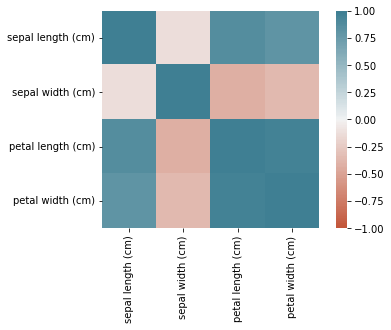

In [ ]:
iris = datasets.load_iris()
iris_data=pd.DataFrame(iris.data,columns=iris.feature_names)

corr_matrix=iris_data.corr()
ax = sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
iris_data.drop_duplicates()
iris_data.drop(['sepal width (cm)'], axis=1) # as it is not correlated with other features
iris_data['target']=pd.Series(iris.target)
iris_data=iris_data.to_numpy()


**Encoding y**

In [ ]:
iris_data_train,iris_data_test=train_test_split(iris_data,test_size=30,random_state=42)
y_test=onehot_encoder.fit_transform(iris_data_test[:,4].reshape(-1,1))
y_train=onehot_encoder.fit_transform(iris_data_train[:,4].reshape(-1,1))
iris_data_train=iris_data_train[:,0:3]
iris_data_test=iris_data_test[:,0:3]

**Our Iris Model**

In [ ]:
layer1=Linear(3,3)
layer3=sigmoid()
loss_fun=MSSE()
for i in range(500): # 500 is just by trial an error to get loss to be as minimum as possible
  forward=layer3.forward(((layer1.forward(iris_data_train))))
  loss,grad=loss_fun.loss(forward,y_train)
  layer1.backward(((layer3.backward(grad))))
print("loss is")
print(loss.sum())

loss is
0.24181363767358724


**Testing and seeing accuracy**



In [ ]:
test=layer3.forward(((layer1.forward(iris_data_test))))

print( accuracy_score(test.argmax(axis=1),y_test.argmax(axis=1)))


0.9


## Refrence
https://becominghuman.ai/understanding-neural-networks-2-the-math-of-neural-networks-in-3-equations-6085fd3f09df
https://towardsdatascience.com/how-to-define-a-neural-network-as-a-mathematical-function-f7b820cde3f
